# The Anscombe's Quartet Dataset

## Background of the Dataset

## Plotting the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
                 
df

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


In [2]:
df.loc[:,['x1', 'y1']]

,x1,y1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


### Plotting using matplotlib

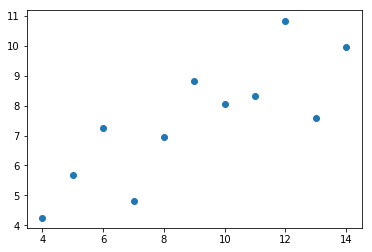

In [3]:
import matplotlib.pyplot as plt

x1 = df.loc[:,'x1']
y1 = df.loc[:,'y1']

plt.scatter(x1, y1)
plt.show()


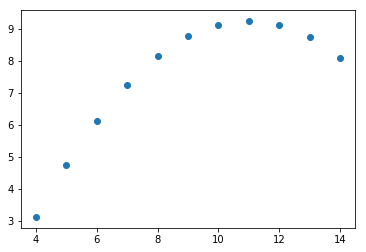

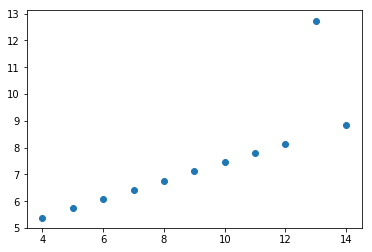

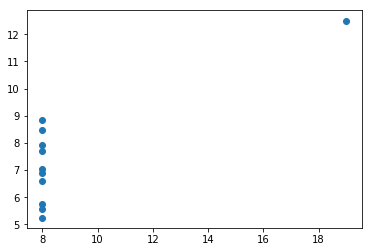

In [4]:
x2 = df.loc[:,'x2']
x3 = df.loc[:,'x3']
x4 = df.loc[:,'x4']

y2 = df.loc[:,'y2']
y3 = df.loc[:,'y3']
y4 = df.loc[:,'y4']


plt.scatter(x2, y2)
plt.show()

plt.scatter(x3, y3)
plt.show()

plt.scatter(x4, y4)
plt.show()

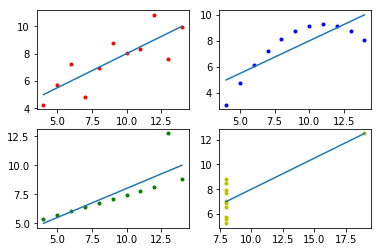

In [5]:
# Subplots from https://matplotlib.org/gallery/specialty_plots/anscombe.html
# Linear regression plotting from https://plot.ly/matplotlib/linear-fits/
# Linear regression line was determined below (in Descriptive Statistics section) to be equal to y = 0.5x + 3.00

import numpy as np

# Function to return minimum x values to produce linear regression line
def xLine(xVal):
    return np.array([np.min(xVal), np.max(xVal)])

# Function to return y values for passed x values to produce linear regression line
def yLine(xArray):
    return 0.5 * xArray  + 3.00


plt.subplot(221)
plt.plot(x1, y1, 'r.', xLine(x1), yLine(xLine(x1)))

plt.subplot(222)
plt.plot(x2, y2, 'b.', xLine(x2), yLine(xLine(x2)))

plt.subplot(223)
plt.plot(x3, y3, 'g.', xLine(x3), yLine(xLine(x3)))

plt.subplot(224)
plt.plot(x4, y4, 'y.', xLine(x4), yLine(xLine(x4)))

plt.show()

### Plotting using pandas

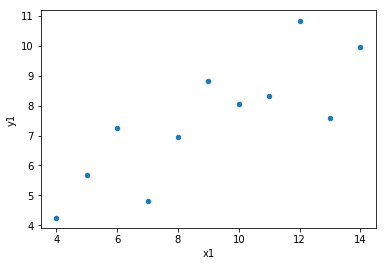

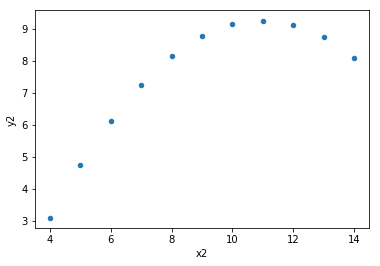

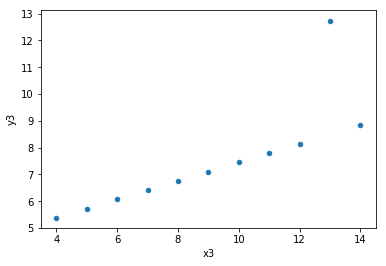

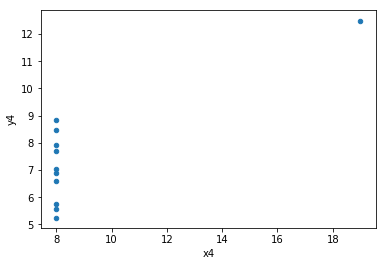

In [6]:
df.plot.scatter(x = 'x1', y = 'y1')
plt.show()

df.plot.scatter(x = 'x2', y = 'y2')
plt.show()

df.plot.scatter(x = 'x3', y = 'y3')
plt.show()

df.plot.scatter(x = 'x4', y = 'y4')
plt.show()

## Descriptive Statistics

In [7]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.000000,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,1.000000,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,3.500000,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,6.000000,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,8.500000,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,11.000000,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


All have a count of 11

Mean of x's = 9.000000

Mean of y's = 7.50 (correct to 2 d.p.)

Standard deviation of x's = 3.316625

Standard deviation of y's = 2.03 (correct to 2 d.p.)

### Determining the linear regression line

In [8]:
import numpy as np

linear1 = np.polyfit(x1, y1, 1)

linear2 = np.polyfit(x2, y2, 1)

linear3 = np.polyfit(x3, y3, 1)

linear4 = np.polyfit(x4, y4, 1)

print("The slope of the line and the y intercept for the linear regression lines for each dataset are:")
      
print("x1 vs y1:", linear1)
print("x2 vs y2:", linear2)
print("x3 vs y3:", linear3)
print("x4 vs y4:", linear4)


The slope of the line and the y intercept for the linear regression lines for each dataset are:
x1 vs y1: [ 0.50009091  3.00009091]
x2 vs y2: [ 0.5         3.00090909]
x3 vs y3: [ 0.49972727  3.00245455]
x4 vs y4: [ 0.49990909  3.00172727]


We can see that the linear regression lines for each dataset is y= 0.5x + 3.00 (m correct to 1 d.p. and c correct to 2 d.p.)

In [9]:
# Adapted from https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy 
from scipy.stats import linregress

linregress(x1,y1)

LinregressResult(slope=0.50009090909090914, intercept=3.0000909090909103, rvalue=0.81642051634483992, pvalue=0.0021696288730787901, stderr=0.11790550059563408)

## Why the Dataset is Interesting